087-auto_denoise_custom_file_V3.0

https://www.youtube.com/watch?v=wZVjMbnpzl4

Bu örnekte önceki gibi resimlerdeki gürültü (parazit) kaldırma amaçlanıyor
ancak diğerinden farklı olarak kendi datasetimiz ile yapılacak (mikroskop görüntüleri)

"""
Try for 100 epochs and plot accuracy
Also try for 920x920 image size
Definitely need a lot of training images.
Does data augmentation help?
"""

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from keras.preprocessing.image import img_to_array

In [5]:
# x is noisy data and y is clean data
SIZE = 320

from tqdm import tqdm
noisy_data=[]
path1 = '/content/sample_noise_dataset/noisy'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,1)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noisy_data.append(img_to_array(img))

100%|██████████| 8/8 [00:00<00:00, 141.23it/s]


In [6]:
clean_data=[]
path2 = '/content/sample_noise_dataset/clean'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,1)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clean_data.append(img_to_array(img))

100%|██████████| 8/8 [00:00<00:00, 189.14it/s]


In [7]:
noisy_train = np.reshape(noisy_data, (len(noisy_data), SIZE, SIZE, 1))
noisy_train = noisy_train.astype('float32') / 255.

clean_train = np.reshape(clean_data, (len(clean_data), SIZE, SIZE, 1))
clean_train = clean_train.astype('float32') / 255.

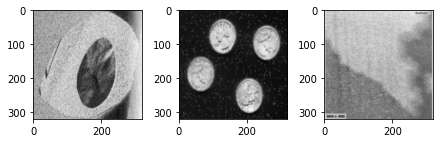

In [8]:
#Displaying images with noise
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()


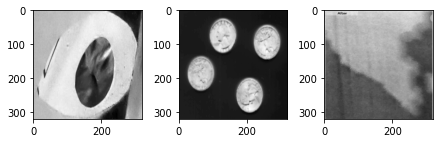

In [9]:
#Displaying clean images
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 320, 320, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 160, 160, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 160, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 80, 80, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 80, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 40, 40, 8)        0

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, 
                                                    test_size = 0.20, random_state = 0)



In [13]:

model.fit(x_train, y_train, epochs=10, batch_size=8, shuffle=True, verbose = 1,
          validation_split = 0.1)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.1686 - accuracy: 1.9531e-05 - val_loss: 0.2761 - val_accuracy: 0.0188
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.1659 - accuracy: 1.9531e-05 - val_loss: 0.2695 - val_accuracy: 0.0188
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 0.1609 - accuracy: 1.9531e-05 - val_loss: 0.2621 - val_accuracy: 0.0188
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.1555 - accuracy: 1.9531e-05 - val_loss: 0.2505 - val_accuracy: 0.0188
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.1459 - accuracy: 1.9531e-05 - val_loss: 0.2370 - val_accuracy: 0.0188
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.1348 - accuracy: 1.9531e-05 - val_loss: 0.2210 - val_accuracy: 0.0188
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.1224 - accuracy: 1.9531e-05 - val_loss: 0.2015 - val_accuracy: 0.0188
Epoch 8/10
1/

In [14]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))

1/1 [==============================] - 0s 207ms/step - loss: 0.1652 - accuracy: 0.0000e+00
Test_Accuracy: 0.00%


In [15]:
model.save('denoising_autoencoder.model')

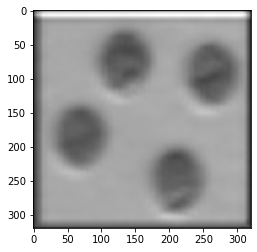

In [17]:
no_noise_img = model.predict(x_test)


plt.imshow(no_noise_img[1].reshape(SIZE,SIZE), cmap="gray")
#plt.imsave('sandstone/denoised_images/denoised_image.tif', no_noise_img[3].reshape(SIZE,SIZE))

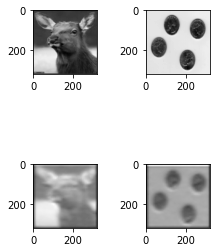

In [19]:
plt.figure(figsize=(40, 4))
for i in range(len(y_test)):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")
plt.show()